In [1]:
import pysors

import optforge as of
import numpy as np

In [3]:
def rosenbrock(arr):
    x,y = arr
    a = 1
    b = 100
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

In [4]:
def objective(t:of.Trial):

    method = pysors.RSPI_SPSA(
        a_init = t.suggest_float('a', 1e-8, 10, domain='log2'),
        c_init = t.suggest_float('c', 1e-8, 10, domain='log2'),
        beta = t.suggest_float('beta', 1e-8, 10, ),
        sigma_1 = t.suggest_float('sigma_1', 1e-8, 10, ),
        sigma_2 = t.suggest_float('sigma_2', 1e-8, 10, ),
        distribution = t.suggest_categorical('distribution', ['Normal', 'Uniform']),
        step_upd = t.suggest_categorical('step_upd', ['half', 'inv', 'inv_sqrt']),
        theta = t.suggest_float('theta', 1e-8, 10, ),
        T_half = t.suggest_int('T_half', 1, 1000, ),
        T_power = t.suggest_int('T_half', 1, 1000, ),
    )

    vals = []
    for i in range(10):
        res = pysors.minimize(rosenbrock, [-3,-4], method, stopval=None, maxfun=1000)
        vals.append(res.value)

    return sum(vals)

In [2]:
study = of.minimize_trial_func(objective, 'optuna.tpe', max_evals=1000)
study.best_params

f:\Stuff\Programming\AI\pySORS\pySORS\pysors\rspi.py:44: RuntimeWarning: invalid value encountered in divide
  d2 = Hd/np.linalg.norm(Hd)


f:\Stuff\Programming\AI\pySORS\pySORS\pysors\rspi.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  b_power = 1/lmax
f:\Stuff\Programming\AI\pySORS\pySORS\pysors\rspi.py:78: RuntimeWarning: invalid value encountered in divide
  d2  = d2_/np.linalg.norm(d2_)


C:\Users\nkshv\AppData\Local\Temp\ipykernel_1636\1561303487.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return (a - x) ** 2 + b * (y - x ** 2) ** 2
C:\Users\nkshv\AppData\Local\Temp\ipykernel_1636\1561303487.py:8: RuntimeWarning: overflow encountered in scalar power
  return (a - x) ** 2 + b * (y - x ** 2) ** 2


evals: 1000/1000 | best value: 0.0851                            
Job finished in 506.8s., did 1000 evaluations.


{'a': 4.352007678883365,
 'c': 0.004018636235598696,
 'beta': 2.000521281764176,
 'sigma_1': 0.736538615869831,
 'sigma_2': 0.1542205611560199,
 'distribution': 'Normal',
 'step_upd': 'inv_sqrt',
 'theta': 1.4135364318214703,
 'T_half': 1}

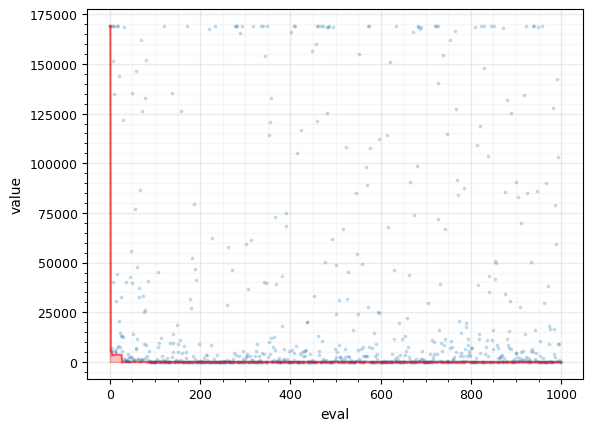

In [15]:
study.history.plot_convergence()